# Medical Cost Personal Dataset

In [1]:
# Importing Libraries that are required
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read in the Insurance dataset
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#One hot encoding the categorical variables
insurance_one_hot =pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
# create features and labels
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [11]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [12]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [13]:
# creating training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Building a neural network
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
tf.keras.layers.Dense(10),
    
tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0229 - mae: 7792.0229
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1733 - mae: 7493.1733

In [17]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

## Try to improve our model

In [20]:
# Building a neural network
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
tf.keras.layers.Dense(100),
    
tf.keras.layers.Dense(10),
    
tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics=['mae'])

insurance_model_2.fit(X_train, y_train, epochs=100,  verbose=0)

In [21]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

## Try with different model

In [25]:
# Building a neural network
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
tf.keras.layers.Dense(100),
    
tf.keras.layers.Dense(10),
    
tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics=['mae'])

history = insurance_model_3.fit(X_train, y_train, epochs=200,  verbose=0)

In [26]:
# Check the results of the insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3494.5291 - mae: 3494.5291


[3494.529052734375, 3494.529052734375]

Text(0.5, 0, 'epochs')

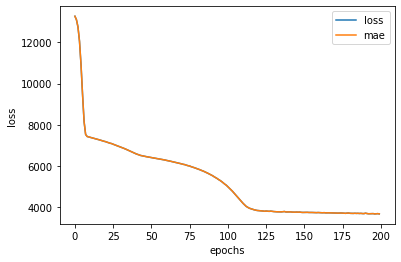

In [28]:
# Plot history(also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Preprocessing Data(standardization and normalization)

In [49]:
# Importing Libraries that are required
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Read in the Insurance dataset
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [52]:
# Create a colums Transformer
ct = make_column_transformer((MinMaxScaler(),
                              ['age','bmi','children']),
                            (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
                            )

In [61]:
# create features and labels
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Fit column transformer to our training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [65]:
# Transform train and test data with normalization
X_train_normal = ct.transform(X_train)

X_test_normal = ct.transform(X_test)

In [67]:
# What does our data look like now
X_train.iloc[0]

age                46
sex            female
bmi             19.95
children            2
smoker             no
region      northwest
Name: 560, dtype: object

In [68]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [70]:
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

In [72]:
# Building a neural network
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
tf.keras.layers.Dense(100),
    
tf.keras.layers.Dense(10),
    
tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics=['mae'])

insurance_model_4.fit(X_train_normal, y_train, epochs=100,  verbose=0)

In [73]:
# Check the results of the insurance model on the test data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

### from insurance_model_2 results we have imporved the mae by normalizing the data which is from `4924.5093` to `3438.7844`

In [ ]:
# 9/9 [==============================] - 0s 3ms/step - loss: 4924.5093 - mae: 4924.5093
# [4924.50927734375, 4924.50927734375]